# K-Means Clustering

### Introduction

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances.


K-means clustering is a common example of an exclusive clustering method where data points are assigned into K groups, where K represents the number of clusters based on the distance from each group’s centroid. The data points closest to a given centroid will be clustered under the same category. A larger K value will be indicative of smaller groupings with more granularity whereas a smaller K value will have larger groupings and less granularity. K-means clustering is commonly used in market segmentation, document clustering, image segmentation, and image compression.

### Algorithm

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way kmeans algorithm works is as follows:

Specify number of clusters K.
Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
Compute the sum of the squared distance between data points and all centroids.
Assign each data point to the closest cluster (centroid).
Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

<img src="KM1.png" alt="Drawing" style="width: 900px;"/>

### Task
We will use the breast_cancer dataset loaded from sklearn.datasets to demonstrate this new technique. The Introduction of breast_cancer dataset is described in README.md

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

bc=load_breast_cancer()

In [4]:
X=bc.data[:,0:2]
y=bc.target

In [5]:
def colors(y):
    if y == 0:
        return "red"
    elif y==1:
        return "blue"
    else:
        return "magenta"

c = [colors(label) for label in y]

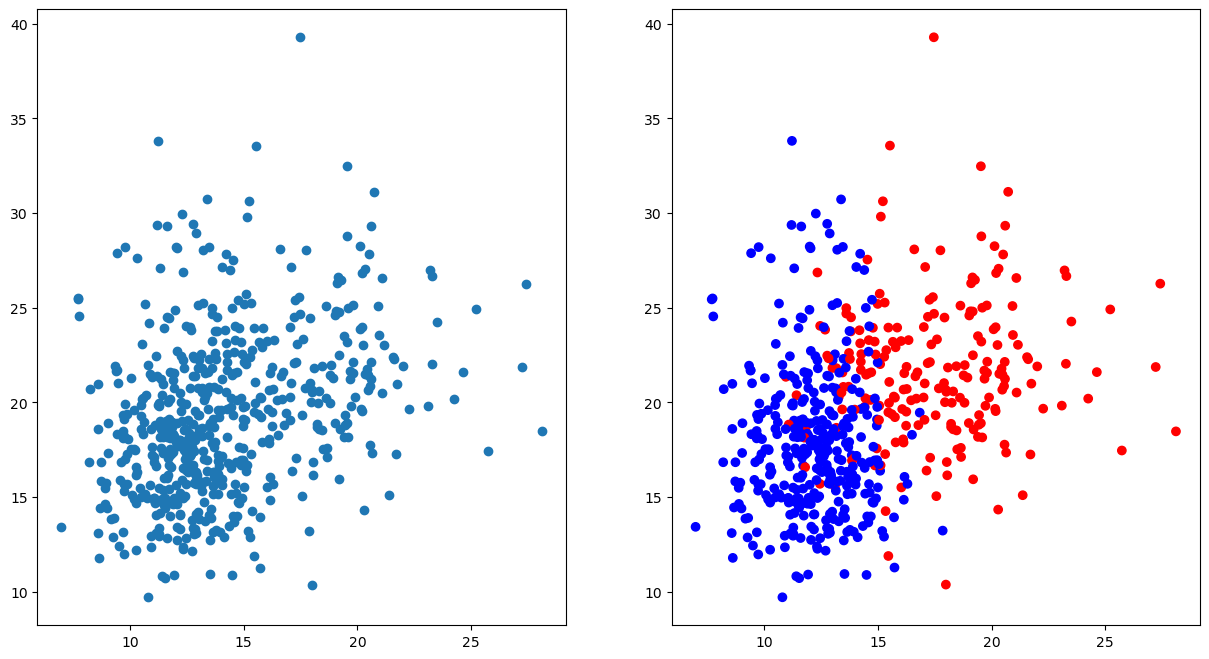

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X[:, 0], X[:, 1],c=c)
plt.show()

In [7]:
k=2
centroids = []
for _ in range(k):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centroids.append(point)

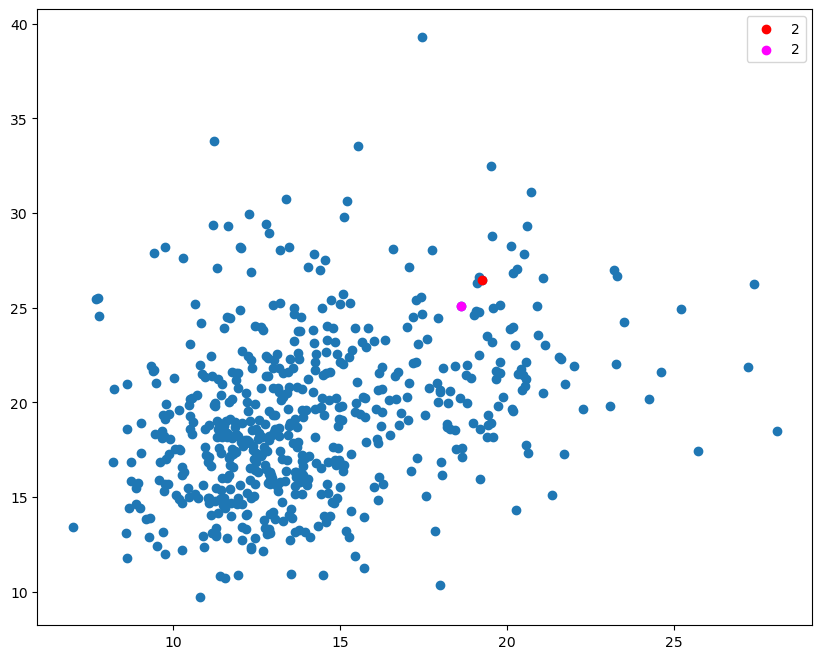

In [8]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2])
plt.scatter([centroids[1][0]], [centroids[1][1]], color = "magenta", label = centroids[1][2])
plt.legend()
plt.show()

In [9]:
def distance(i, X, centroid):
    return np.sqrt(sum((X[i, j] - centroid[j])**2 for j in range(2)))
def assign_label(i, X, centroid):
    distances = np.array([distance(i, X, centroid) for centroid in centroids])
    label = np.argmin(distances)
    return label 
def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(len(X))]

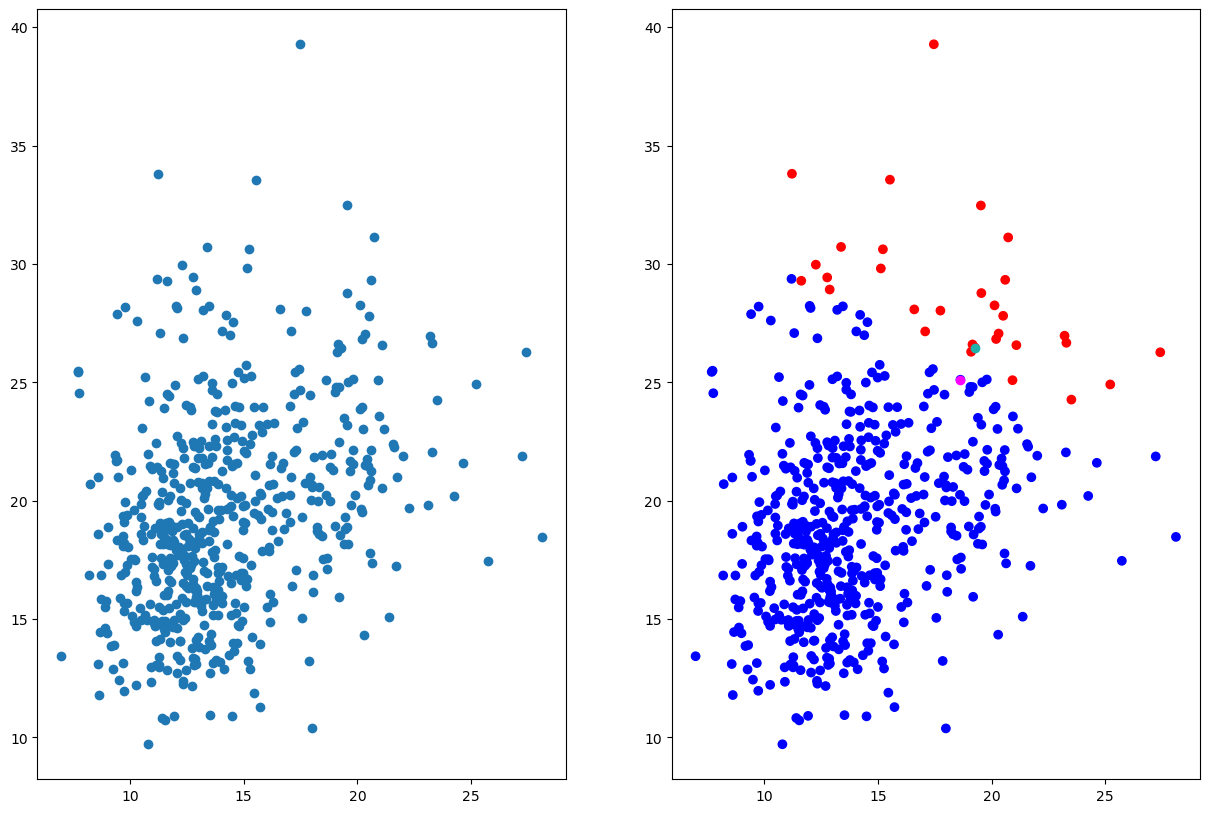

In [10]:
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1])#, c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], color = "lightseagreen", label = centroids[0][2])
ax2.scatter([centroids[1][0]], [centroids[1][1]], color = "magenta", label = centroids[1][2])

plt.show()

In [11]:
def update_centroids(X, centroids):
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    centroid_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        centroid_means[current_labels[i]][0] += X[i, 0]
        centroid_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i) if current_labels.count(i) else 1
        centroid_means[i][0] = centroid_means[i][0]/num_occur
        centroid_means[i][1] = centroid_means[i][1]/num_occur
    
    return [(centroid_means[i][0], centroid_means[i][1],i) for i in centroid_means]

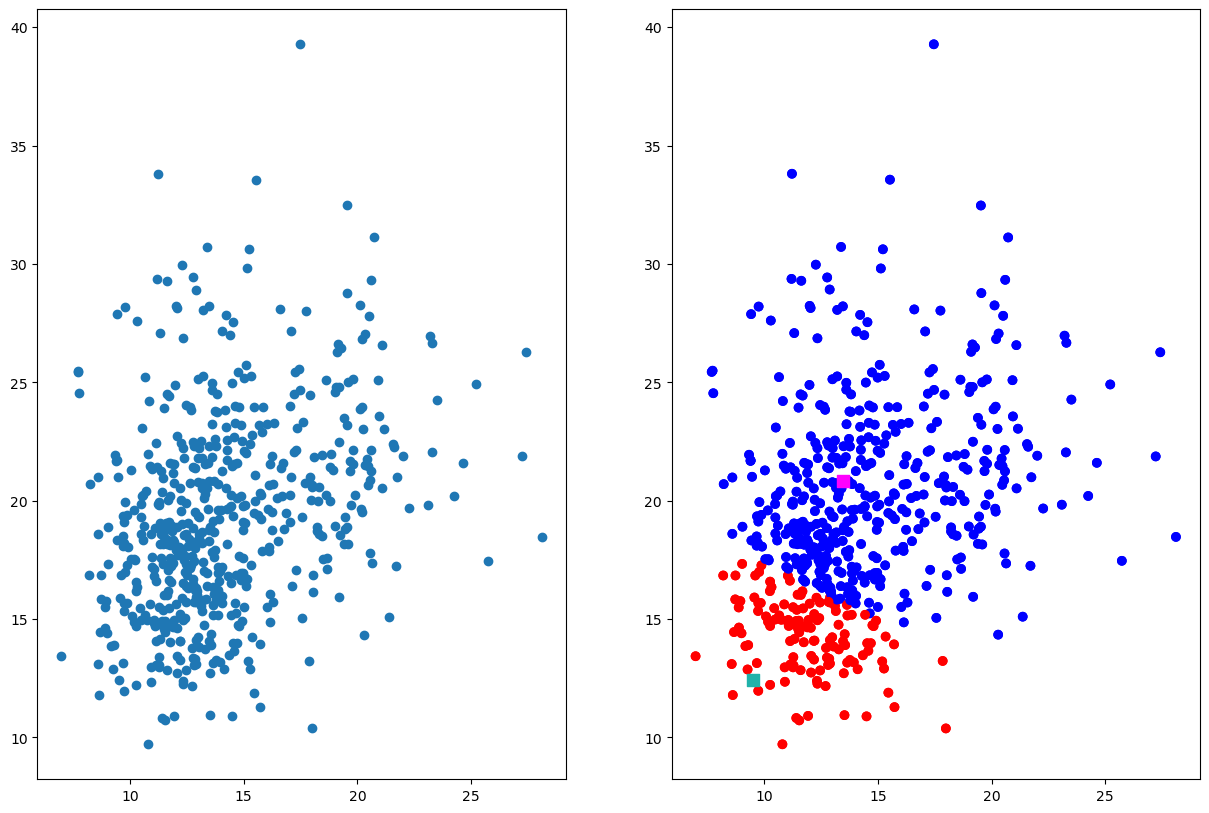

In [12]:
k=2
centroids = []
for k in range(k):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centroids.append(point)


new_centroids = update_centroids(X, centroids)
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1])

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], 
            color = "lightseagreen", 
            label = centroids[0][2],
            s=80,
            marker="s")
ax2.scatter([centroids[1][0]], [centroids[1][1]], 
            color = "magenta", label = centroids[1][2],
            s=80,
            marker="s")

As we can see from above left graph, the two centroids are at the center of these two clusters

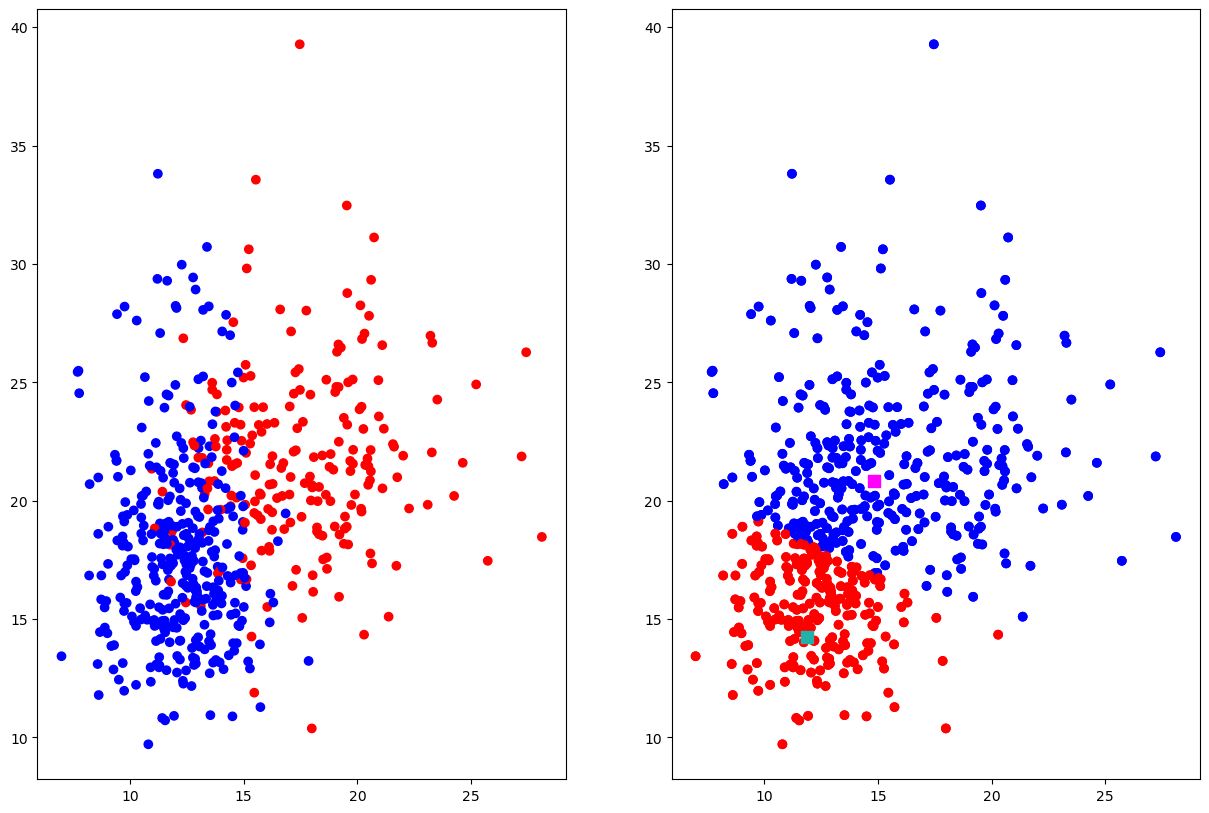

In [13]:
centroids = update_centroids(X, centroids)
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1],c=c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], 
            color = "lightseagreen", 
            label = centroids[0][2],
            s=80,
            marker="s")
ax2.scatter([centroids[1][0]], [centroids[1][1]], 
            color = "magenta", label = centroids[1][2],
            s=80,
            marker="s")

In [14]:
def k_means_clustering(X, k, max_iter = 100):
    centroids = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centroids.append(point)
    
    for _ in range(max_iter):
        centroids = update_centroids(X, centroids)

    return centroids
    

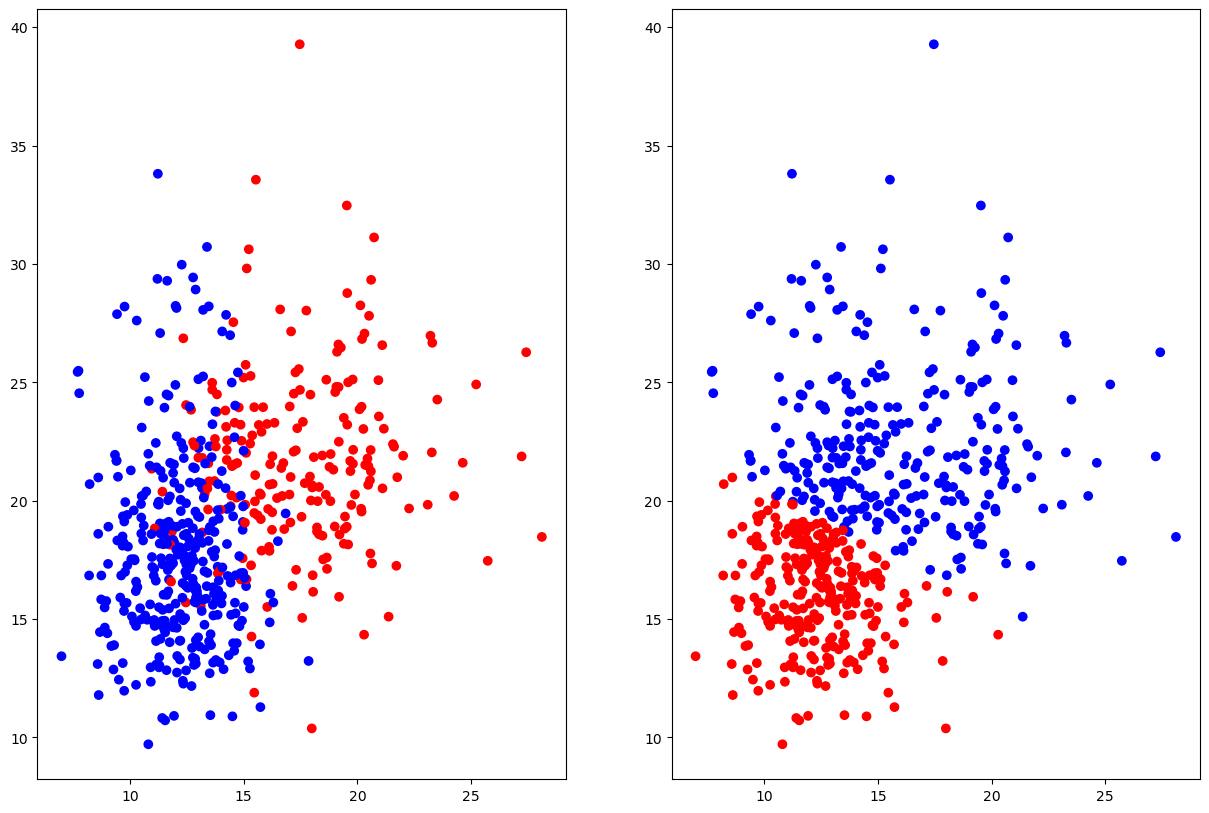

In [15]:
centroids = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()